In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

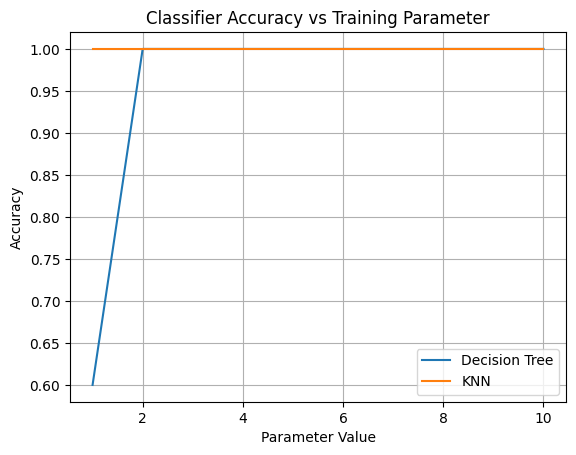

In [2]:
"""
    Evaluate how classifier performance changes with varying key parameters, for Decision Tree vary max_depth from 1 to 10, for K-Nearest Neighbors: vary k from 1 to 10
    Loads the Iris dataset, splits it into training and testing sets, computes accuracy scores for both classifiers for each parameter value, plots accuracy vs parameter value for both classifiers
    """
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

dtc_accuracies = []
for d in range(1, 11): # Vary Decision Tree max_depth
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    dtc_accuracies.append(acc)

knn_accuracies = []
for k in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    knn_accuracies.append(acc)

plt.plot(range(1, 11), dtc_accuracies, label='Decision Tree')
plt.plot(range(1, 11), knn_accuracies, label='KNN')
plt.xlabel("Parameter Value")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy vs Training Parameter")
plt.legend()
plt.grid(True)
plt.show()

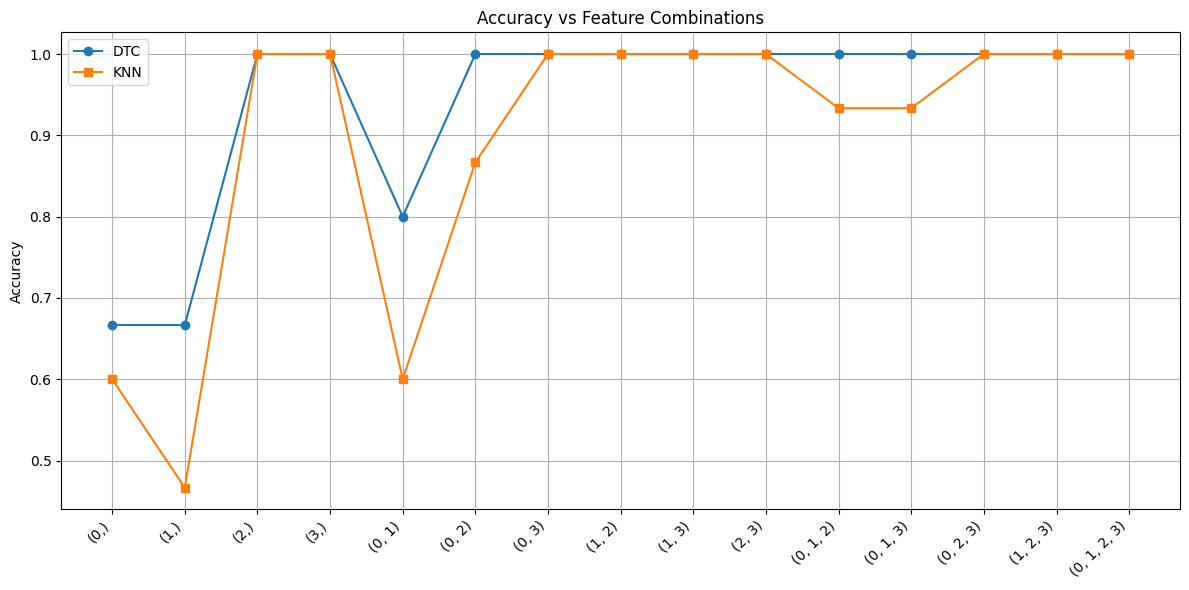

In [3]:
"""
    Evaluate classifier performance on all non-empty combinations of Iris dataset features.
    Generates all possible non-empty subsets of the 4 features.
    For each subset-Trains DecisionTreeClassifier (DTC) and KNeighborsClassifier (KNN), Computes their accuracy on a test set, Plots accuracy scores for each feature combination.
    Demonstrates that using more features does not always improve accuracy, helps identify the best feature subsets for each classifier.
    Supports understanding of the "curse of dimensionality".
    """
combinations = []
for i in range(1, 5):
    combinations += list(itertools.combinations(range(4), i))

dtc_combo_scores = []
knn_combo_scores = []

for combo in combinations:
    X_subset = X[:, combo]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.1, random_state=1)
    dtc = DecisionTreeClassifier(max_depth=3)
    dtc.fit(X_train, y_train)
    dtc_combo_scores.append(accuracy_score(y_test, dtc.predict(X_test)))

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn_combo_scores.append(accuracy_score(y_test, knn.predict(X_test)))

labels = [str(c) for c in combinations]
x_pos = np.arange(len(labels))
plt.figure(figsize=(12, 6))
plt.plot(x_pos, dtc_combo_scores, marker='o', label="DTC")
plt.plot(x_pos, knn_combo_scores, marker='s', label="KNN")
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy vs Feature Combinations")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

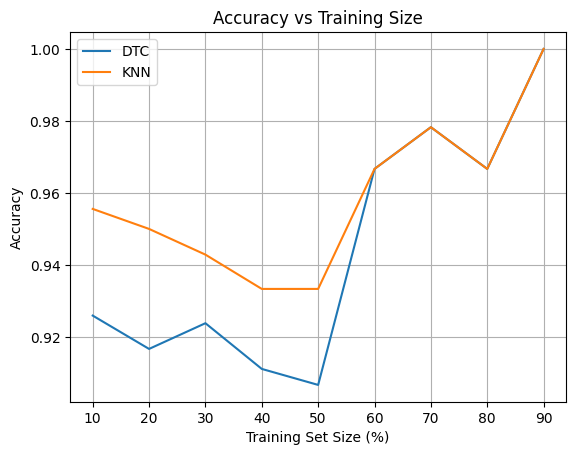

In [ ]:
"""
    Analyze how the size of the training set affects classifier performance using the best feature subset.
    Uses the best-performing feature (e.g., petal length) determined from previous analysis.
    Varies the training set size from 10% to 90% in 10% increments.
    For each size, splits the data accordingly and trains:
    DecisionTreeClassifier with fixed max_depth=3
    KNeighborsClassifier with fixed k=3
    Records and plots their test accuracies as training size changes.
    """
best_combo = [2]  # Based on previous analysis: petal length
dtc_ratios = []
knn_ratios = []
splits = list(range(10, 100, 10))

for train_pct in splits:
    test_size = 1 - train_pct / 100
    X_train, X_test, y_train, y_test = train_test_split(X[:, best_combo], y, test_size=test_size, random_state=1)

    dtc = DecisionTreeClassifier(max_depth=3)
    dtc.fit(X_train, y_train)
    dtc_ratios.append(accuracy_score(y_test, dtc.predict(X_test)))

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn_ratios.append(accuracy_score(y_test, knn.predict(X_test)))
plt.plot(splits, dtc_ratios, label="DTC")
plt.plot(splits, knn_ratios, label="KNN")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Size")
plt.grid(True)
plt.legend()
plt.show()